# Implementation of Simple PIERRE in Python

Note: For this small inspiring set loading from a string is more convenient in Colab but for your own projects you will likely use an external file.

In [1]:
data = """{
  "recipes": [
    {
      "name": "beef chilli",
      "ingredients": [
        { "amount": 150,  "unit": "g",  "ingredient": "minced beef" },
        { "amount": 100,  "unit": "g",  "ingredient": "onion" },
        { "amount": 100,  "unit": "ml", "ingredient": "water" },
        { "amount": 300,  "unit": "g",  "ingredient": "tomato" },
        { "amount": 5,    "unit": "g",  "ingredient": "chilli powder" },
        { "amount": 300,  "unit": "g",  "ingredient": "red kidney beans" }
      ]
    },
    {
      "name": "cabbage soup",
      "ingredients": [
        { "amount": 80,   "unit": "g",  "ingredient": "carrot" },
        { "amount": 100,  "unit": "g",  "ingredient": "onion" },
        { "amount": 150,  "unit": "g",  "ingredient": "tomato" },
        { "amount": 200,  "unit": "g",  "ingredient": "cabbage" },
        { "amount": 5,    "unit": "g",  "ingredient": "dry onion soup mix" },
        { "amount": 70,   "unit": "g",  "ingredient": "green bean" },
        { "amount": 150,  "unit": "ml", "ingredient": "tomato juice" },
        { "amount": 100,  "unit": "g",  "ingredient": "celery" },
        { "amount": 100,  "unit": "ml", "ingredient": "beef broth" }
      ]
    },
    {
      "name": "chicken soup",
      "ingredients": [
        { "amount": 5,    "unit": "g",  "ingredient": "butter" },
        { "amount": 50,   "unit": "g",  "ingredient": "onion" },
        { "amount": 30,   "unit": "g",  "ingredient": "celery" },
        { "amount": 600,  "unit": "ml", "ingredient": "chicken broth" },
        { "amount": 100,  "unit": "ml", "ingredient": "vegetable broth" },
        { "amount": 100,  "unit": "g",  "ingredient": "chicken breast" },
        { "amount": 50,   "unit": "g",  "ingredient": "egg noodle" },
        { "amount": 50,   "unit": "g",  "ingredient": "carrot" },
        { "amount": 5,    "unit": "g",  "ingredient": "basil" },
        { "amount": 5,    "unit": "g",  "ingredient": "oregano" }
      ]
    },
    {
      "name": "butternut squash soup",
      "ingredients": [
        { "amount": 800, "unit": "g",  "ingredient": "butternut squash"},
        { "amount": 100,  "unit": "g",  "ingredient": "onion"},
        { "amount": 50,   "unit": "g",  "ingredient": "carrot"},
        { "amount": 15,   "unit": "g",  "ingredient": "garlic"},
        { "amount": 10,   "unit": "g",  "ingredient": "thyme"},
        { "amount": 5,    "unit": "g",  "ingredient": "sage"},
        { "amount": 200,  "unit": "ml", "ingredient": "chicken broth"},
        { "amount": 1,    "unit": "g",  "ingredient": "salt"},
        { "amount": 1,    "unit": "g",  "ingredient": "pepper"},
        { "amount": 1,    "unit": "g",  "ingredient": "cayenne"},
        { "amount": 20,   "unit": "ml", "ingredient": "double cream"},
        { "amount": 5,    "unit": "g",  "ingredient": "parsley"}
      ]
    },
    {
      "name": "split pea soup",
      "ingredients": [
        { "amount": 200,  "unit": "g",  "ingredient": "split peas"},
        { "amount": 150,  "unit": "g",  "ingredient": "onion"},
        { "amount": 50,   "unit": "g",  "ingredient": "carrot"},
        { "amount": 50,   "unit": "g",  "ingredient": "celery"},
        { "amount": 10,   "unit": "g",  "ingredient": "garlic"},
        { "amount": 10,   "unit": "g",  "ingredient": "thyme"},
        { "amount": 10,   "unit": "g",  "ingredient": "ground ginger"},
        { "amount": 2,    "unit": "g",  "ingredient": "chili flakes"},
        { "amount": 500,  "unit": "ml", "ingredient": "chicken broth"},
        { "amount": 30,   "unit": "g",  "ingredient": "bacon"},
        { "amount": 1,    "unit": "g",  "ingredient": "salt"},
        { "amount": 1,    "unit": "g",  "ingredient": "black pepper"}
      ]
    },
    {
      "name": "corn chowder",
      "ingredients": [
        { "amount": 200,  "unit": "g",  "ingredient": "baby potatoes"},
        { "amount": 10,   "unit": "g",  "ingredient": "plain flour"},
        { "amount": 500,  "unit": "ml", "ingredient": "chicken broth"},
        { "amount": 200,  "unit": "g",  "ingredient": "sweetcorn"},
        { "amount": 5,    "unit": "g",  "ingredient": "thyme"},
        { "amount": 5,    "unit": "g",  "ingredient": "basil"},
        { "amount": 5,    "unit": "g",  "ingredient": "onion powder"},
        { "amount": 1,    "unit": "g",  "ingredient": "salt"},
        { "amount": 1,    "unit": "g",  "ingredient": "black pepper"},
        { "amount": 200,  "unit": "g",  "ingredient": "chicken"},
        { "amount": 50,   "unit": "g",  "ingredient": "cheese"},
        { "amount": 20,   "unit": "ml", "ingredient": "milk"},
        { "amount": 10,   "unit": "ml", "ingredient": "double cream"},
        { "amount": 10,   "unit": "g",  "ingredient": "bacon"},
        { "amount": 20,   "unit": "g",  "ingredient": "chives"}
      ]
    },
    {
      "name": "mulligatawny soup",
      "ingredients": [
        { "amount": 50,   "unit": "g",  "ingredient": "onion" },
        { "amount": 60,   "unit": "g",  "ingredient": "carrot" },
        { "amount": 60,   "unit": "g",  "ingredient": "celery" },
        { "amount": 30,   "unit": "g",  "ingredient": "butter" },
        { "amount": 5,    "unit": "g",  "ingredient": "flour" },
        { "amount": 5,    "unit": "g",  "ingredient": "curry powder" },
        { "amount": 500,  "unit": "ml", "ingredient": "chicken broth" },
        { "amount": 100,  "unit": "g",  "ingredient": "apple" },
        { "amount": 20,   "unit": "g",  "ingredient": "rice" },
        { "amount": 100,  "unit": "g",  "ingredient": "chicken breast" },
        { "amount": 60,   "unit": "ml", "ingredient": "double cream" }
      ]
    }
  ]
}"""

## Loading the Inspiring Set

We start by loading the inspiring set from a JSON string. We'll also load some helpful libraries.

In [2]:
import json
import pprint
import random
import math

recipes = json.loads(data)['recipes']

To check what we have loaded we can use the pretty printing library (pprint).

In [3]:
pprint.PrettyPrinter(indent=2, depth=3).pprint(recipes[0])

{ 'ingredients': [ {'amount': 150, 'ingredient': 'minced beef', 'unit': 'g'},
                   {'amount': 100, 'ingredient': 'onion', 'unit': 'g'},
                   {'amount': 100, 'ingredient': 'water', 'unit': 'ml'},
                   {'amount': 300, 'ingredient': 'tomato', 'unit': 'g'},
                   {'amount': 5, 'ingredient': 'chilli powder', 'unit': 'g'},
                   { 'amount': 300,
                     'ingredient': 'red kidney beans',
                     'unit': 'g'}],
  'name': 'beef chilli'}


Next we extract all of the ingredients from the recipes, so that we can use them in mutation operators.

In [4]:
all_ingredients = []
for recipe in recipes:
  all_ingredients.extend(recipe['ingredients'])

To check on the complete list of ingredients, we can use the pprint library to provide formatted list.

In [5]:
print(len(all_ingredients))

75


In [6]:
pprint.PrettyPrinter(indent=2, depth=2).pprint(all_ingredients)

[ {'amount': 150, 'ingredient': 'minced beef', 'unit': 'g'},
  {'amount': 100, 'ingredient': 'onion', 'unit': 'g'},
  {'amount': 100, 'ingredient': 'water', 'unit': 'ml'},
  {'amount': 300, 'ingredient': 'tomato', 'unit': 'g'},
  {'amount': 5, 'ingredient': 'chilli powder', 'unit': 'g'},
  {'amount': 300, 'ingredient': 'red kidney beans', 'unit': 'g'},
  {'amount': 80, 'ingredient': 'carrot', 'unit': 'g'},
  {'amount': 100, 'ingredient': 'onion', 'unit': 'g'},
  {'amount': 150, 'ingredient': 'tomato', 'unit': 'g'},
  {'amount': 200, 'ingredient': 'cabbage', 'unit': 'g'},
  {'amount': 5, 'ingredient': 'dry onion soup mix', 'unit': 'g'},
  {'amount': 70, 'ingredient': 'green bean', 'unit': 'g'},
  {'amount': 150, 'ingredient': 'tomato juice', 'unit': 'ml'},
  {'amount': 100, 'ingredient': 'celery', 'unit': 'g'},
  {'amount': 100, 'ingredient': 'beef broth', 'unit': 'ml'},
  {'amount': 5, 'ingredient': 'butter', 'unit': 'g'},
  {'amount': 50, 'ingredient': 'onion', 'unit': 'g'},
  {'amoun

## Creating an Initial Population

Now we can create an initial population, by first defining the population size and then selecting from the list of recipes.

In [7]:
population_size = 20

population = random.choices(recipes, k=population_size)

And we can check on the recipes that were selected in the initial population.

In [8]:
pprint.PrettyPrinter(indent=2, depth=2).pprint(population)
population

[ {'ingredients': [...], 'name': 'cabbage soup'},
  {'ingredients': [...], 'name': 'chicken soup'},
  {'ingredients': [...], 'name': 'split pea soup'},
  {'ingredients': [...], 'name': 'butternut squash soup'},
  {'ingredients': [...], 'name': 'split pea soup'},
  {'ingredients': [...], 'name': 'butternut squash soup'},
  {'ingredients': [...], 'name': 'mulligatawny soup'},
  {'ingredients': [...], 'name': 'beef chilli'},
  {'ingredients': [...], 'name': 'cabbage soup'},
  {'ingredients': [...], 'name': 'mulligatawny soup'},
  {'ingredients': [...], 'name': 'butternut squash soup'},
  {'ingredients': [...], 'name': 'corn chowder'},
  {'ingredients': [...], 'name': 'chicken soup'},
  {'ingredients': [...], 'name': 'split pea soup'},
  {'ingredients': [...], 'name': 'cabbage soup'},
  {'ingredients': [...], 'name': 'chicken soup'},
  {'ingredients': [...], 'name': 'split pea soup'},
  {'ingredients': [...], 'name': 'butternut squash soup'},
  {'ingredients': [...], 'name': 'cabbage soup'

[{'name': 'cabbage soup',
  'ingredients': [{'amount': 80, 'unit': 'g', 'ingredient': 'carrot'},
   {'amount': 100, 'unit': 'g', 'ingredient': 'onion'},
   {'amount': 150, 'unit': 'g', 'ingredient': 'tomato'},
   {'amount': 200, 'unit': 'g', 'ingredient': 'cabbage'},
   {'amount': 5, 'unit': 'g', 'ingredient': 'dry onion soup mix'},
   {'amount': 70, 'unit': 'g', 'ingredient': 'green bean'},
   {'amount': 150, 'unit': 'ml', 'ingredient': 'tomato juice'},
   {'amount': 100, 'unit': 'g', 'ingredient': 'celery'},
   {'amount': 100, 'unit': 'ml', 'ingredient': 'beef broth'}]},
 {'name': 'chicken soup',
  'ingredients': [{'amount': 5, 'unit': 'g', 'ingredient': 'butter'},
   {'amount': 50, 'unit': 'g', 'ingredient': 'onion'},
   {'amount': 30, 'unit': 'g', 'ingredient': 'celery'},
   {'amount': 600, 'unit': 'ml', 'ingredient': 'chicken broth'},
   {'amount': 100, 'unit': 'ml', 'ingredient': 'vegetable broth'},
   {'amount': 100, 'unit': 'g', 'ingredient': 'chicken breast'},
   {'amount': 50

## Evaluating Recipes (Fitness Function)

The following function defines how individuals are evaluated:

In [9]:
def evaluate_recipes(recipes):
  for r in recipes:
    r['fitness'] = len(r['ingredients'])

We can use this to evaluate the initial population.

In [10]:
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

In [11]:
pprint.PrettyPrinter(indent=2, depth=2).pprint(population)

[ {'fitness': 15, 'ingredients': [...], 'name': 'corn chowder'},
  {'fitness': 15, 'ingredients': [...], 'name': 'corn chowder'},
  {'fitness': 12, 'ingredients': [...], 'name': 'split pea soup'},
  {'fitness': 12, 'ingredients': [...], 'name': 'butternut squash soup'},
  {'fitness': 12, 'ingredients': [...], 'name': 'split pea soup'},
  {'fitness': 12, 'ingredients': [...], 'name': 'butternut squash soup'},
  {'fitness': 12, 'ingredients': [...], 'name': 'butternut squash soup'},
  {'fitness': 12, 'ingredients': [...], 'name': 'split pea soup'},
  {'fitness': 12, 'ingredients': [...], 'name': 'split pea soup'},
  {'fitness': 12, 'ingredients': [...], 'name': 'butternut squash soup'},
  {'fitness': 11, 'ingredients': [...], 'name': 'mulligatawny soup'},
  {'fitness': 11, 'ingredients': [...], 'name': 'mulligatawny soup'},
  {'fitness': 10, 'ingredients': [...], 'name': 'chicken soup'},
  {'fitness': 10, 'ingredients': [...], 'name': 'chicken soup'},
  {'fitness': 10, 'ingredients': [..

## Selecting Recipes

The following function implements Roulette Wheel selection of individuals based on their fitness:

In [12]:
def select_recipe(recipes):
  sum_fitness = sum([recipe['fitness'] for recipe in recipes])
  # print("fitness_sum", sum_fitness)
  f = random.randint(0, sum_fitness)
  for recipe in recipes:
    if f < recipe['fitness']:
      # print("f", f)
      # print(recipe['fitness'])
      return recipe
    # print("f_before", f)
    # print("fitness", recipe['fitness'])
    f -= recipe['fitness']
    # print("f_after", f)
  return recipes[-1]

select_recipe(population)

{'name': 'butternut squash soup',
 'ingredients': [{'amount': 800,
   'unit': 'g',
   'ingredient': 'butternut squash'},
  {'amount': 100, 'unit': 'g', 'ingredient': 'onion'},
  {'amount': 50, 'unit': 'g', 'ingredient': 'carrot'},
  {'amount': 15, 'unit': 'g', 'ingredient': 'garlic'},
  {'amount': 10, 'unit': 'g', 'ingredient': 'thyme'},
  {'amount': 5, 'unit': 'g', 'ingredient': 'sage'},
  {'amount': 200, 'unit': 'ml', 'ingredient': 'chicken broth'},
  {'amount': 1, 'unit': 'g', 'ingredient': 'salt'},
  {'amount': 1, 'unit': 'g', 'ingredient': 'pepper'},
  {'amount': 1, 'unit': 'g', 'ingredient': 'cayenne'},
  {'amount': 20, 'unit': 'ml', 'ingredient': 'double cream'},
  {'amount': 5, 'unit': 'g', 'ingredient': 'parsley'}],
 'fitness': 12}

## Genetic Operators

The following functions implement the genetic operators of crossover and mutation. Crossover takes two recipes and combines them by choosing a point on each genotype (recipe) to split each list into two, and joining the first sublist from one genotype with the second sublist of the second genotype.

In [13]:
recipe_number = 1

def crossover_recipes(r1, r2):
  global recipe_number
  p1 = random.randint(1, len(r1['ingredients'])-1)
  p2 = random.randint(1, len(r2['ingredients'])-1)
  r1a = r1['ingredients'][0:p1]
  r2b = r2['ingredients'][p2:-1]
  r = dict()
  r['name'] = "recipe {}".format(recipe_number)
  recipe_number += 1
  r['ingredients'] = r1a + r2b
  return r

The mutation operator changes a recipe using one of four different types of mutations: (1) changing the amount of an ingredient, (2) changing the type of an ingredient, (3) adding an ingredient, and (4) removing an ingredient.

In [14]:
def mutate_recipe(r):
  m = random.randint(0, 3)
  if m == 0:
    i = random.randint(0, len(r['ingredients'])-1)
    r['ingredients'][i] = r['ingredients'][i].copy()
    r['ingredients'][i]['amount'] += math.floor(r['ingredients'][i]['amount'] * 0.1)
    r['ingredients'][i]['amount'] = max(1, r['ingredients'][i]['amount'])
  elif m == 1:
    j = random.randint(0, len(r['ingredients'])-1)
    r['ingredients'][j] = r['ingredients'][j].copy()
    r['ingredients'][j]['ingredient'] = random.choice(all_ingredients)['ingredient']
  elif m == 2:
    r['ingredients'].append(random.choice(all_ingredients).copy())
  else:
    if len(r['ingredients']) > 1:
      r['ingredients'].remove(random.choice(r['ingredients']))

The following function is domain-specific and normalises a generated recipe by removing duplicate ingredients (combining the amounts of all instances of an ingredient) and rescaling the volume of ingredients listed to 1 litre (1000 units).

In [15]:
def normalise_recipe(r):
  unique_ingredients = dict()
  for i in r['ingredients']:
    if i['ingredient'] in unique_ingredients:
      n = unique_ingredients[i['ingredient']]
      n['amount'] += i['amount']
    else:
      unique_ingredients[i['ingredient']] = i.copy()
  r['ingredients'] = list(unique_ingredients.values())

  sum_amounts = sum([i['amount'] for i in r['ingredients']])
  scale = 1000 / sum_amounts
  for i in r['ingredients']:
    i['amount'] = max(1, math.floor(i['amount'] * scale))

## Generating Recipes

We use the above functions to generate recipes.

In [16]:
def generate_recipes(size, population):
  R = []
  while len(R) < size:
    r1 = select_recipe(population)
    r2 = select_recipe(population)
    r = crossover_recipes(r1, r2)
    # mutate_recipe(r)
    normalise_recipe(r)
    R.append(r)
  evaluate_recipes(R)
  return R

## Selecting a New Population

The final function that we need to implement is one that selects a new population given the previous population and the generated recipes.

In [17]:
def select_population(P, R):
  R = sorted(R, reverse = True, key = lambda r: r['fitness'])
  P = P[0:len(P)//2] + R[0:len(R)//2]
  P = sorted(P, reverse = True, key = lambda r: r['fitness'])
  return P

## Putting it All Together...

To run the genetic algorithm, we repeat here the code to set up and evaluated an initial population, before running the evolutionary process for a number of steps.

In [18]:
population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []
for i in range(1000):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

We can check on the progress of the evolution by plotting the fitness history we captured above. Here we plot both the maximum fitness each population and the range fitnesses (filling between max fitness and min fitness).

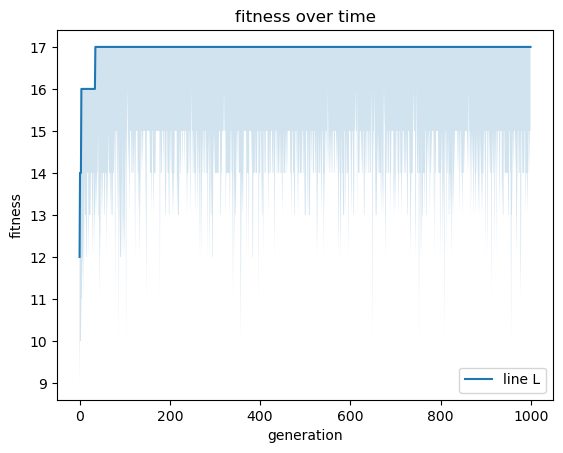

In [19]:
import matplotlib.pyplot as plt

x  = range(1000)
plt.plot(x, max_fitnesses, label="line L")
plt.fill_between(x, min_fitnesses, max_fitnesses, alpha=0.2)
plt.plot()

plt.xlabel("generation")
plt.ylabel("fitness")
plt.title("fitness over time")
plt.legend()
plt.show()

Finally, because the recipe is always sorted according to fitness, the fittest individual will be the one in the first position, so we can print this out.

In [20]:
pprint.PrettyPrinter(indent=2, depth=3).pprint(population[0])

{ 'fitness': 17,
  'ingredients': [ {'amount': 25, 'ingredient': 'minced beef', 'unit': 'g'},
                   {'amount': 77, 'ingredient': 'onion', 'unit': 'g'},
                   {'amount': 15, 'ingredient': 'water', 'unit': 'ml'},
                   {'amount': 118, 'ingredient': 'carrot', 'unit': 'g'},
                   {'amount': 150, 'ingredient': 'celery', 'unit': 'g'},
                   {'amount': 20, 'ingredient': 'garlic', 'unit': 'g'},
                   {'amount': 18, 'ingredient': 'thyme', 'unit': 'g'},
                   {'amount': 2, 'ingredient': 'flour', 'unit': 'g'},
                   {'amount': 1, 'ingredient': 'curry powder', 'unit': 'g'},
                   {'amount': 552, 'ingredient': 'chicken broth', 'unit': 'ml'},
                   {'amount': 1, 'ingredient': 'salt', 'unit': 'g'},
                   {'amount': 1, 'ingredient': 'pepper', 'unit': 'g'},
                   {'amount': 2, 'ingredient': 'sage', 'unit': 'g'},
                   {'amount': 1, 'ing